In [1]:
# Import some important libraries for data analysis
import pandas as pd
import numpy as np
#For plotting
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv("vaping.csv")
df.shape

(1136, 12)

In [3]:
df.columns


Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1',
       'Have you ever vaped?', 'Do you have any form of social media?',
       'Approximately how much time do you spend on social media per day?'],
      dtype='object')

# Preprocessing

In [4]:
df.head()
# First row is not containing any data, so we drop it.
df=df.drop(0)
df.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,Have you ever vaped?,Do you have any form of social media?,Approximately how much time do you spend on social media per day?
1,1.131619e+10,252912708.0,02/01/2020 03:39:50 PM,02/01/2020 03:40:13 PM,NaN,NaN,NaN,NaN,NaN,No,Yes,4 hours or more
2,1.131619e+10,252912708.0,02/01/2020 03:36:34 PM,02/01/2020 03:36:47 PM,NaN,NaN,NaN,NaN,NaN,No,Yes,4 hours or more
3,1.131616e+10,252912708.0,02/01/2020 02:58:57 PM,02/01/2020 02:59:13 PM,NaN,NaN,NaN,NaN,NaN,No,Yes,3 hours
4,1.131615e+10,252912708.0,02/01/2020 02:49:05 PM,02/01/2020 02:49:17 PM,NaN,NaN,NaN,NaN,NaN,No,Yes,4 hours or more
5,1.131612e+10,252912708.0,02/01/2020 02:07:59 PM,02/01/2020 02:08:10 PM,NaN,NaN,NaN,NaN,NaN,No,Yes,4 hours or more


In [5]:
# To check if any of the columns are empty
df['Have you ever vaped?'].isnull().sum()

0

In [6]:
# This gives the number of null values for each column
# if axis=1 then it gives number of null values for each row
df.isnull().sum(axis=0)

Respondent ID                                                           0
Collector ID                                                            0
Start Date                                                              0
End Date                                                                0
IP Address                                                           1135
Email Address                                                        1135
First Name                                                           1135
Last Name                                                            1135
Custom Data 1                                                        1135
Have you ever vaped?                                                    0
Do you have any form of social media?                                   2
Approximately how much time do you spend on social media per day?       0
dtype: int64

In [7]:
#To print the number of times a value appears in a column
df['Have you ever vaped?'].value_counts(dropna=False)

No     809
Yes    326
Name: Have you ever vaped?, dtype: int64

In [8]:
df['Do you have any form of social media?'].value_counts(dropna=False)

Yes    1122
No       11
NaN       2
Name: Do you have any form of social media?, dtype: int64

In [9]:
df['Approximately how much time do you spend on social media per day?'].value_counts(dropna=False)

4 hours or more                            495
3 hours                                    281
2 hours                                    223
1 hour                                     104
30 minutes or less                          22
I don't spend any time on social media.     10
Name: Approximately how much time do you spend on social media per day?, dtype: int64

In [10]:
# Drop all columns that have nan or missing values
df  = df.drop(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1'], axis=1)
# Drop all rows that have Nan or missing value
df.shape
df = df.dropna()  #only two rows were removed
df.shape

(1133, 3)

# Plotting data for univariate analysis

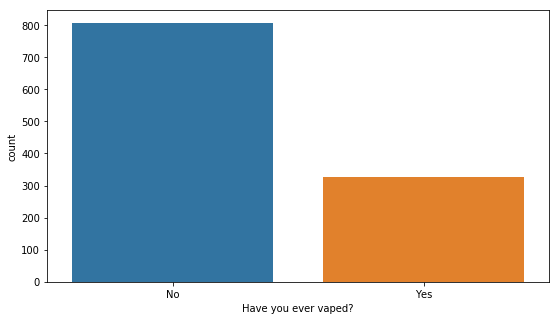

In [11]:
# All of our data is categorical

# Determine width and height of graph
plt.figure(figsize=(9,5))

sns.countplot(df['Have you ever vaped?'].dropna())

# To limit the number of groups shown in seaborn plot by ordering from highest to lowest
#sns.countplot(df['Have you ever vaped?'].dropna(),order = df['Have you ever vaped?'].value_counts().index)

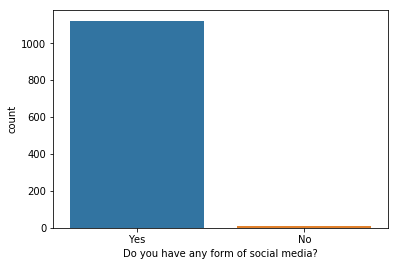

In [12]:
sns.countplot(df['Do you have any form of social media?'].dropna())


Text(0,0.5,'Social Media Usage')

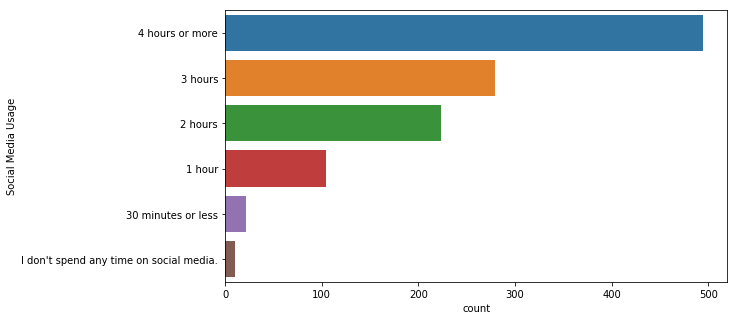

In [13]:
# Determine width and height of graph
plt.figure(figsize=(9,5))
# Draw the usage on y-axis
l=sns.countplot(y=df['Approximately how much time do you spend on social media per day?'].dropna(),
              order = df['Approximately how much time do you spend on social media per day?'].value_counts().index)
# Customize y label
l.set_ylabel("Social Media Usage")

# Plotting for Bivariate Analysis

In [14]:
# All our data is categorical, for analysis, it is required that we encode it numerically.

# Import preprocessing library from sci-kit learn
from sklearn import preprocessing
# Create a labelencoder object
le = preprocessing.LabelEncoder()
#Fit label encoder and return encoded labels
df['vaped_numeric']=le.fit_transform(df['Have you ever vaped?'])
#df['vaped_numeric']
df[['Have you ever vaped?','vaped_numeric']].head(10)

,Have you ever vaped?,vaped_numeric
1,No,0
2,No,0
3,No,0
4,No,0
5,No,0
6,No,0
7,No,0
8,Yes,1
9,No,0
10,No,0


In [15]:
# Repeat this for other categorical data
"""
mode = df['Do you have any form of social media?'].mode()
print(mode)
#df['Do you have any form of social media?'] = df['Do you have any form of social media?'].astype(str)
df['Do you have any form of social media?']=df['Do you have any form of social media?'].fillna('Yes')
"""

df['sm_numeric'] = le.fit_transform(df['Do you have any form of social media?'])

df['sm_numeric'].value_counts(dropna=False)
df[['Do you have any form of social media?','sm_numeric']].head(10)

,Do you have any form of social media?,sm_numeric
1,Yes,1
2,Yes,1
3,Yes,1
4,Yes,1
5,Yes,1
6,Yes,1
7,Yes,1
8,Yes,1
9,Yes,1
10,Yes,1


In [16]:
#Rename column because its too long
df.rename(columns = {'Approximately how much time do you spend on social media per day?':'sm_time'}, inplace = True)

df['sm_time'].value_counts()
# add a new column to store numerical data for time spent on social media
df['sm_usage_numeric'] = pd.Series({})

# Map categorical data to numeric data
# I don't spend any time on social media is mapped to 0
# 30 minutes or less is mapped to 1
# 1 hour is mapped to 2
# 2 hours is mapped to 3
# 3 hours is mapped to 4
# 4 hours or more is mapped to 5
for i in range(len(df)):
    if df['sm_time'].iloc[i]=="I don't spend any time on social media.":
        df['sm_usage_numeric'].iloc[i]=0
    elif df['sm_time'].iloc[i]=='30 minutes or less':
        df['sm_usage_numeric'].iloc[i]=1
    elif df['sm_time'].iloc[i]=='1 hour':
        df['sm_usage_numeric'].iloc[i]=2
    elif df['sm_time'].iloc[i]=='2 hours':
        df['sm_usage_numeric'].iloc[i]=3
    elif df['sm_time'].iloc[i]=='3 hours':
        df['sm_usage_numeric'].iloc[i]=4
    else:# df['sm_time'][i]=='4 hours or more':
        df['sm_usage_numeric'].iloc[i]=5



/usr/lib/python3/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
#Drop the categorical columns
df.columns
df= df.drop(['Have you ever vaped?','Do you have any form of social media?'],axis=1)
df = df.drop(['sm_time'],axis=1)
df.columns

Index(['vaped_numeric', 'sm_numeric', 'sm_usage_numeric'], dtype='object')

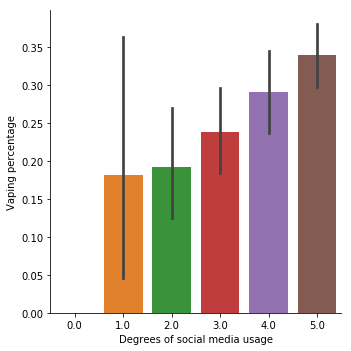

In [18]:
# Plot social media usage versus vaping 
# Social media is mapped from 0(never use social media) to 5(4 or more hours)
# The mean value of vaping is plotted on the y-axis

# ci is Size of confidence intervals to draw around estimated values. 
# If “sd”, skip bootstrapping and draw the standard deviation of the observations. 
# If None, no bootstrapping will be performed, and error bars will not be drawn.
# Set ci=None if you dont want to draw confidence intervals

l=sns.catplot(x="sm_usage_numeric", y="vaped_numeric", kind="bar", data=df)

# Customize x and y axes labels
l.set_axis_labels("Degrees of social media usage","Vaping percentage")

#This plot shows that as people spend more time on social media, it is 
# possible that they vape. 

In [19]:
# Based on the above graph it is a good idea to
# determine the proportion of people vaping in each category of social media users

# Group 0: People who don't spend anytime on social media
# Group 1: People who spend 30 minutes or less on social media
# Group 2: People who spend 1 hour on social media
# Group 3: People who spend 2 hours on social media
# Group 4: People who spend 3 hours on social media
# Group 5: People who spend 4 or more hours on social media

# Compute the percentage of vapers in each group and store it in a list
target_values=[]

# For each group from 0 to 5
for i in range(0,6):
    # Obtain all rows that match with group i
    filter1 = df['sm_usage_numeric']==i
    # Obtain all rows that are vapers
    filter2 = df['vaped_numeric']==1
    # Determine the number of rows that satisfy the criteria for both filter 1 and 2 
    num = len(df[filter1&filter2]['sm_usage_numeric'])
    # Determine the number of rows that satisfy criteria for filter 1
    den = len(df[filter1]['sm_usage_numeric'])
    # Determine the percentage of vapers group i
    value = num/den
    # Append values to a list
    target_values.append(value)

# Create a new column called 'target' to the dataframe df
df['target'] = pd.Series({})
# Under this new column we will add the percentage of vaping
for i in range(len(df)):
    # If it is group 0 then add the percentage for group 0
    if df['sm_usage_numeric'].iloc[i]==0:
        df['target'].iloc[i] = target_values[0]
    # else if it is group 1 then add the percentage for group 1 and so on
    elif df['sm_usage_numeric'].iloc[i]==1:
        df['target'].iloc[i] = target_values[1]
    elif df['sm_usage_numeric'].iloc[i]==2:
        df['target'].iloc[i] = target_values[2]
    elif df['sm_usage_numeric'].iloc[i]==3:
        df['target'].iloc[i] = target_values[3]
    elif df['sm_usage_numeric'].iloc[i]==4:
        df['target'].iloc[i] = target_values[4]
    else:
        df['target'].iloc[i] = target_values[5]

#Print the first 5 rows of dataframe
df['target'].head(5)

/usr/lib/python3/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


1    0.339394
2    0.339394
3    0.290323
4    0.339394
5    0.339394
Name: target, dtype: float64

In [20]:
df.columns

Index(['vaped_numeric', 'sm_numeric', 'sm_usage_numeric', 'target'], dtype='object')

In [21]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split
# Split the data into training set and test set by
# picking rows randomly from the dataframe 
# random_state option is used to pick the same set of rows each time the
# function is called. This can be used for verification.
x_train, x_test, y_train, y_test = train_test_split(df['sm_usage_numeric'],df['target'],random_state=42)
# x_train and x_test are vectors(1-D array) of inputs
print(x_train.shape) # 75%
print(x_test.shape)  # 25%

# y_train and y_test are vectors(1-D array) of outputs
print(y_train.shape) # 75%
print(y_test.shape)  # 25%

y_train.head()

(849,)
(284,)
(849,)
(284,)


73      0.237668
695     0.237668
976     0.237668
323     0.339394
1012    0.237668
Name: target, dtype: float64

In [22]:
import sklearn.linear_model

# Select a linear regression model
model = sklearn.linear_model.LinearRegression()
 
# Usually x_train is 2 D where the columns correspond to features. 
# Our data has only one feature so we need to reshape it to 2D
x_train = x_train.reshape(-1,1)

# Train the model - allows us to find the slope and y-intercept
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# We will score our model on test data, to see how good it is.
# Reshape the test data first
x_test =x_test.reshape(-1,1)
# Score the accuracy of the model
model.score(x_test,y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


0.9676084752837351

In [24]:
# Prediction based on our model
# Given an unlabeled data point representing how much time is spent on social media, 
# predict how likely that student is going to vape?

# Let's say student is in group 5 (4 or more hours on social media)
x_new = np.array([[5]])

# Call the predict method to make a prediction
prediction = model.predict(x_new)
# Output the value (a numpy array)
print("Prediction: "+'%.2f'%(prediction[0]*100)+"%")

Prediction: 34.03%


In [25]:
# This is the slope of our line - it is not zero so there is some bearing 
# of social media on vaping
model.coef_

array([0.05085523])

In [26]:
# This is the y-intercept of our line
model.intercept_

0.08599391831179598

In [27]:
# Checking our slope and intercept with x set to 5
model.coef_*5 + model.intercept_

array([0.34027008])

Text(0,0.5,'Vaping percentage')

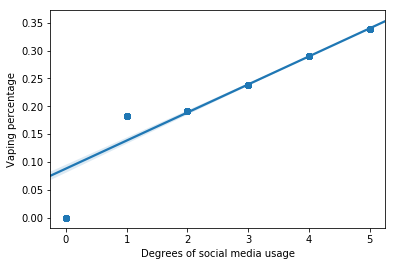

In [28]:
# Draw a regression line to best fit the data
l=sns.regplot(x=df['sm_usage_numeric'], y=df['target'])  
l.set_xlabel("Degrees of social media usage")
l.set_ylabel("Vaping percentage")

In [29]:
# Calculations necessary for assessing the model
# Calculate SSxy (sum of squares of errors in x and y)
# SSxy = sum(xi*yi) - n*mean(x)*mean(y)
total=0
for i in range(0,len(df)):
    total+= df['sm_usage_numeric'].iloc[i]*df['target'].iloc[i]

x_mean = df['sm_usage_numeric'].mean()
y_mean = df['target'].mean()

SSxy = total - len(df)*x_mean*y_mean
SSxy

75.08473080320209

In [30]:
#Calculate SSxx (sum of squares of errors in x)
# SSxx = sum(xi^2) - n*mean(x)^2
total=0
for i in range(0,len(df)):
    total += df['sm_usage_numeric'].iloc[i]*df['sm_usage_numeric'].iloc[i]

SSxx = total - len(df)*x_mean*x_mean
SSxx

1490.4430714916125

In [31]:
# Slope is given by SSxy/SSxx - this is the same as model.coef_
SSxy/SSxx

0.05037745636809761

In [32]:
#Calculate SSyy (sum of squares of errors in y)
# SSyy = sum(yi^2) - n*mean(y)^2
total=0
for i in range(0,len(df)):
    total += df['target'].iloc[i]*df['target'].iloc[i]

SSyy = total - len(df)*y_mean*y_mean
SSyy

3.9036204124001728

In [33]:
# Calculate coefficient of correlation - 
# measure of strength of linear relationship between two variables
# r = SSxy/sqrt(SSxx*SSyy)

from math import sqrt
r = SSxy/sqrt(SSxx*SSyy)
r

# Coefficient of correlation shows a strong positive correlation
# between social media usage and vaping

0.9843740167018148

In [34]:
# Other metrics used for evaluation of the model
# Absolute Mean Error
# Mean Squared Error
# Root Mean Squared error

from sklearn import metrics

y_pred = model.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("Mean of the target set:",df['target'].mean())

Mean Absolute Error: 0.0031086856532746934
Mean Squared Error: 0.00011188558062904878
Root Mean Squared Error: 0.010577598055752013
Mean of the target set: 0.28773168578993824


In [35]:
#Conclusions on the model
# Ho (null hypothesis) : Social media has no influence on Vaping
# Ha (alternative hypothesis): Social media has influence on Vaping

# alpha = 0.05 - probability of type I error (false positive)
# talpha/2 = 1.96 (from student's t table)

# We will compute test statistic t = predicted slope/(s/sqrt(SSxx))
# where s is the standard deviation of the sample
# variance of sample s_squared = SSE/degrees of freedom for error

# Calculate standard deviation:
beta_1 = SSxy/SSxx
SSE = SSyy - beta_1*SSxy
n = len(df)
s_squared = SSE/(n-2)
s = sqrt(s_squared)
print("Standard deviation:"+str(s))
t = beta_1/(s/sqrt(SSxx))
print("t is "+str(t))

# t > 1.96 (talpha/2), therefore we reject Ho

Standard deviation:0.01034517713982612
t is 187.99919962781897


In [36]:
"""
Decision:
t statistic > talpha/2 therefore we reject Ho 

p-value = 0 is less than alpha, we will reject Ho

Therefore, social media has influence over vaping. 
There is a positive correlation between the two.
"""

'\nDecision:\nt statistic > talpha/2 therefore we reject Ho \n\np-value = 0 is less than alpha, we will reject Ho\n\nTherefore, social media has influence over vaping. \nThere is a positive correlation between the two.\n'

In [37]:
# Confidence Interval (alpha=0.05 meaning 95% confidence)
# (slope-talpha/2*s/sqrt(SSxx), slope + talpha/2*s/sqrt(SSxx))

lb = beta_1 - 1.96*s/sqrt(SSxx)
ub = beta_1 + 1.96*s/sqrt(SSxx)
print("("+str(lb)+","+str(ub)+")")

(0.04985224235294783,0.05090267038324739)


In [38]:
"""
We can say, with 95% confidence, that the probability of vaping will
increase between 0.0498 (4.98%) and 0.0509 (5.09%) for every 1 hour 
increase in social media usage.
"""

'\nWe can say, with 95% confidence, that the probability of vaping will\nincrease between 0.0498 (4.98%) and 0.0509 (5.09%) for every 1 hour \nincrease in social media usage.\n'